In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [20]:
# Load the data
df = pd.read_csv('/content/apple_share_price.csv')

In [21]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Train the model
model.fit(train_data, train_data, epochs=100, batch_size=32)

Epoch 1/100
42/42 [==============================] - 5s 7ms/step - loss: 0.1196
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 2.3532e-04
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 1.9342e-04
Epoch 7/100
42/42 [==============================] - 0s 7ms/step - loss: 1.8461e-04
Epoch 8/100
42/42 [==============================] - 0s 6ms/step - loss: 1.6503e-04
Epoch 9/100
42/42 [==============================] - 0s 7ms/step - loss: 1.5227e-04
Epoch 10/100
42/42 [==============================] - 0s 7ms/step - loss: 1.3810e-04
Epoch 11/100
42/42 [==============================] - 0s 6ms/step - loss: 1.2899e-04
Epoch 12/100
42/42 [==============================] - 0s 6ms/step - loss: 1.1201e-04
Epoch

In [23]:
# Evaluate the model
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 4ms/step


In [24]:
# Calculate the mean absolute error
mae = mean_absolute_error(test_data, predictions)
print('MAE:', mae)

MAE: 57.61431422574825


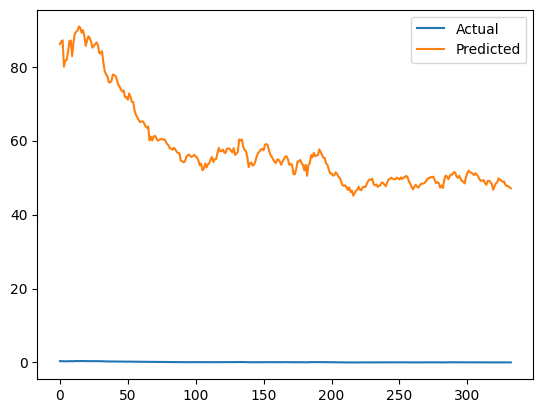

In [25]:
# Plot the results
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()